<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-03 20:43:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-08-03 20:43:14 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head(20)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

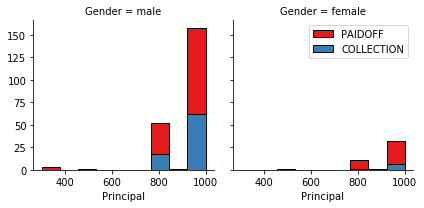

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

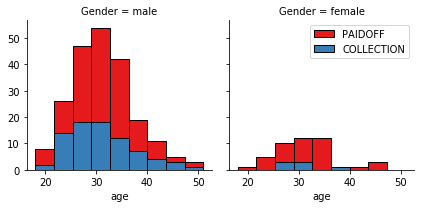

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

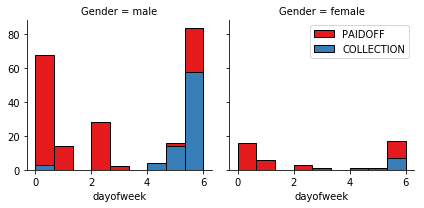

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
Feature['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

What are our lables?

In [19]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = df['loan_status']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

### Import required libraries used for KMM

In [21]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import scipy
from scipy.stats import sem
import itertools

### Finding the best number of neighbors for our KMM model
The algorithm will interate over a range of nearest neighbors to find the best __K__. __K-fold Cross-validation__ will be used to evaluate each __K__. We will chose 5 folds, so each time we will train on __80%__ of the dataset and test on the remaining __20%__. 

In [22]:
Ks = 15 # sets the range of K (nearest nighbors)
kfold = 5
mean_cv_KMM = []
std_cv_KMM = []
Lx = list(range(1, Ks+1))
cv = KFold(n_splits=kfold, random_state=33, shuffle=True) # this cross-validation (cv) is used for all evaluations
#cv = StratifiedKFold(n_splits=kfold, random_state=33, shuffle=True) # this cross-validation (cv) is used for all evaluations
for n in Lx:  
    #Train Model and Predict  
    clf = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_KMM.append(np.mean(scores))
    std_cv_KMM.append(sem(scores))

### Visulazing the the accuracy for different Ks
plot_function plots the accuracy for the choosen number of Neighbors and showing the +/- 1 standard deviations as light blue.
The best __K__ is shown as a red dot on the plot. 

In [23]:
def plot_function(Lx, Ly, Lstd, x_label, y_label):
    """
    Inputs:
    Lx: list
    Ly: list
    Lstd: list
    x_label: string
    y_label: string
    Return:
    Max accuracy
    Index value
    """
    mean = np.array(Ly)
    std = np.array(Lstd)  
    plt.plot(Lx, mean, 'r')
    plt.fill_between(Lx ,mean - 1 * std, mean + 1 * std, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 1xstd'))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.tight_layout()
    plt.scatter(Lx[mean.argmax()], mean.max(), s=50, marker=u'o', alpha=0.9)
    plt.text(Lx[mean.argmax()], mean.max() + 0.005, str(Lx[mean.argmax()]),
         fontdict={'weight': 'bold', 'size': 9})
    plt.show()
    return mean.max(), Lx[mean.argmax()]

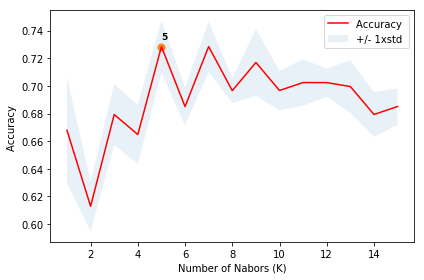

The best accuracy: 0.728 with nighbors=5


In [24]:
Lx = list(range(1, Ks+1))
Ly = mean_cv_KMM
Lstd = std_cv_KMM
x_label = 'Number of Nabors (K)'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with nighbors={1:.0f}").format(Max, Index))

Best average accuracy with __cross-validation__ is __75.4%__ using __5__ Neighbors

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

First we test the two criterions

In [26]:
Criterions = ["gini", "entropy"] # the different types of criterions that are tested
Depth = 2
mean_cv_Tree = []
std_cv_Tree = []
Lx = list(range(1, Depth+1))
for Criterion in Criterions:  
    #Train Model and Predict  
    clf =  DecisionTreeClassifier(criterion=Criterion, max_depth = Depth)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_Tree.append(np.mean(scores))
    std_cv_Tree.append(sem(scores))

### Visulazing the the accuracy for gini and entropy criterions

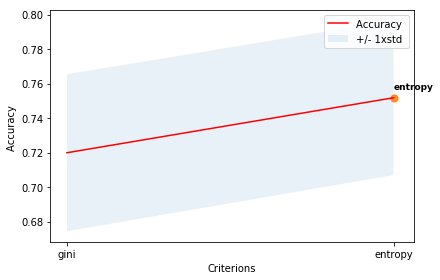

The best accuracy: 0.752 with with best Criterion= entropy


In [27]:
Lx = Criterions
Ly = mean_cv_Tree
Lstd = std_cv_Tree
x_label = 'Criterions'
y_label = 'Accuracy '
Max, Index = plot_function(Lx, Ly, Lstd, x_label, y_label)
print(("The best accuracy: {0:.3f} with with best Criterion= " + str(Index)).format(Max))

# Support Vector Machine

In [95]:
from sklearn import svm

In [96]:
Kernels = ["linear", "poly", "rbf", "sigmoid"] # the different types of kernel functions that are tested
kfold = 5
mean_cv_SVM = []
std_cv_SVM = []
for Kernel in Kernels:  
    #Train Model and Predict  
    clf = svm.SVC(C = 1.0, kernel = Kernel, degree=3, gamma = "scale")
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_SVM.append(np.mean(scores))
    std_cv_SVM.append(sem(scores))

### Visulazing the the accuracy for different kernels

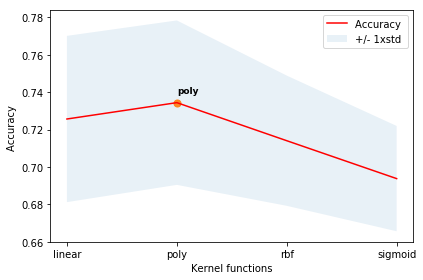

The best accuracy: 0.734 with kernel function: poly


In [97]:
Lx = Kernels
Ly = mean_cv_SVM
Lstd = std_cv_SVM
x_label = 'Kernel functions'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with kernel function: " + str(Index)).format(Max))

### Tuning Gamma for rbf, poly and sigmoid 
Let's see if we can obtain a better performance compared to __linear Kernel__ if we tune gamma

In [98]:
d_mean = {}
d_std = {}
Kernels = ["poly", "rbf", "sigmoid"] # the different types of kernel functions that are tested
gamma_range = np.logspace(-1, 0.3, 50)
for Kernel in Kernels:
    d_mean[Kernel] = []
    d_std[Kernel] = []
    for Gamma in gamma_range:        
        clf = svm.SVC(C = 1.0, kernel = Kernel, degree=3, gamma = Gamma, coef0 = 0.0)
        scores = cross_val_score(clf,X, y, cv=cv)
        d_mean[Kernel].append(np.mean(scores))
        d_std[Kernel].append(sem(scores))

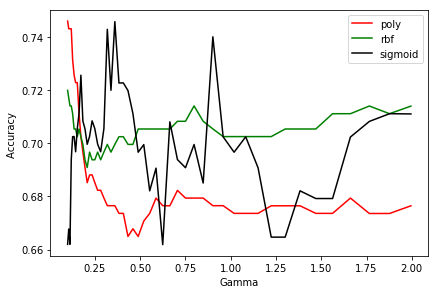

In [99]:
colors = ["red","green","black"]
for Kernel,color in zip(Kernels,colors):
    mean_cv_SVM_plot = np.array(d_mean[Kernel])
    std_cv_SVM_plot = np.array(d_std[Kernel])
    plt.plot(gamma_range, mean_cv_SVM_plot,c = color)
plt.legend(("poly", "rbf", "sigmoid"))
plt.tight_layout()
plt.ylabel('Accuracy ')
plt.xlabel('Gamma')
plt.show()

From above plot it can be seen that tuning Gamma will not increase the accuracy significant, so I will continue using __linear__ kernel 

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
Solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"] # the different types of solvers that are tested
c = 1
mean_cv_LR = []
std_cv_LR = []
for Solver in Solvers:  
    #Train Model and Predict  
    clf = LogisticRegression(C=c, solver=Solver)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_LR.append(np.mean(scores))
    std_cv_LR.append(sem(scores))

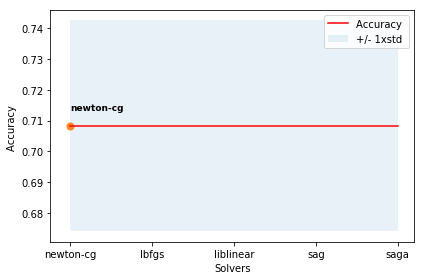

The best accuracy: 0.708 with solver: newton-cg


In [102]:
Lx = Solvers
Ly = mean_cv_LR
Lstd = std_cv_LR
x_label = 'Solvers'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with solver: " + str(Index)).format(Max))

From above plot it can be seen that all solvers has the same performance.

In [103]:
cs = np.logspace(-2, 0.1, 10) # sets the range of K (nearest nighbors)
Solver = "sag"
mean_cv_LR = []
std_cv_LR = []
for c in cs:  
    #Train Model and Predict  
    clf = LogisticRegression(C=c, solver=Solver)
    scores = cross_val_score(clf,X, y, cv=cv)
    mean_cv_LR.append(np.mean(scores))
    std_cv_LR.append(sem(scores))

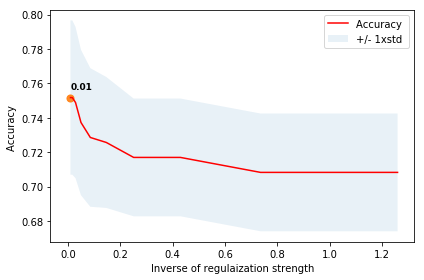

The best accuracy: 0.752 with inverse of regulaization strength: 0.01


In [104]:
Lx = list(cs)
Ly = mean_cv_LR
Lstd = std_cv_LR
x_label = 'Inverse of regulaization strength'
y_label = 'Accuracy '
Max, Index = plot_function(Lx,Ly,Lstd,x_label, y_label)
print(("The best accuracy: {0:.3f} with inverse of regulaization strength: " + str(Index)).format(Max))

# Model Evaluation using Test set

In [105]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

First, download and load the test set:

In [106]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-08-03 20:50:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-08-03 20:50:32 (429 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [107]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Prepare Feature testset and Label

In [108]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)

Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature_test
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

y_test = test_df['loan_status']

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


### Evaluation of K Nearest Neighbor model on test set

#### Confusion matrix & f1-score

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [110]:
def compute_confusion_matrix(y_test,y_pred, Normalize=False):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    np.set_printoptions(precision=2)
    print (classification_report(y_test, y_pred))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'], normalize= Normalize,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.80      0.88      0.83        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.65      0.62      0.62        54
weighted avg       0.72      0.74      0.73        54

Confusion matrix, without normalization
[[35  5]
 [ 9  5]]


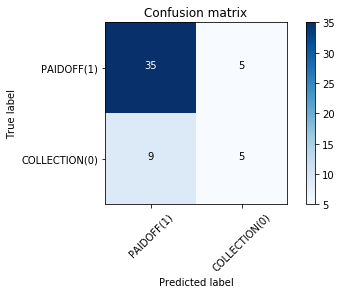

In [111]:
koptimal = 5
KNN_model = KNeighborsClassifier(n_neighbors = koptimal).fit(X,y)
y_pred_KNN = KNN_model.predict(X_test)
compute_confusion_matrix(y_test,y_pred_KNN)

In above confusion matrix, of the __40__ actual PAIDOFF, the KNN model predicted that __5__ were COLLECTION, and of the __14__ COLLECTION, it predicted that __9__ was PAIDOFF. The error rate is higher for COLLECTION compared to PAIDOFF. 

The weighted avg f1-score is __73%__

#### Jaccard index for accuracy:

In [82]:
print(("The jaccard index for accuracy: {0:.2f} ").format(jaccard_similarity_score(y_test, y_pred_KNN)))

The jaccard index for accuracy: 0.74 


### Evaluation of Decision Trees model on test set

#### Confusion matrix & f1-score

              precision    recall  f1-score   support

           0       0.46      0.43      0.44        14
           1       0.80      0.82      0.81        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.72      0.72      0.72        54

Confusion matrix, without normalization
[[33  7]
 [ 8  6]]


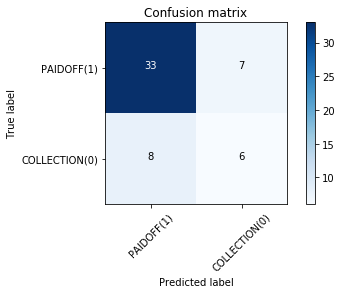

In [87]:
Depth = 5
Tree_model =  DecisionTreeClassifier(criterion="entropy", max_depth = Depth).fit(X,y)
y_pred_TREE = Tree_model.predict(X_test)
compute_confusion_matrix(y_test,y_pred_TREE)

In above confusion matrix, of the __40__ actual PAIDOFF, the KNN model predicted that __7__ were COLLECTION, and of the __14__ COLLECTION, it predicted that __8__ was PAIDOFF. The error rate is higher for COLLECTION compared to PAIDOFF. 

The weighted avg f1-score is __72%__

#### Jaccard index for accuracy:

In [113]:
print(("The jaccard index for accuracy: {0:.3f} ").format(jaccard_similarity_score(y_test, y_pred_TREE)))

The jaccard index for accuracy: 0.722 


### Evaluation of Support Vector Machine model on test set

#### Confusion matrix & f1-score

              precision    recall  f1-score   support

           0       0.40      0.29      0.33        14
           1       0.77      0.85      0.81        40

   micro avg       0.70      0.70      0.70        54
   macro avg       0.59      0.57      0.57        54
weighted avg       0.68      0.70      0.69        54

Confusion matrix, without normalization
[[34  6]
 [10  4]]


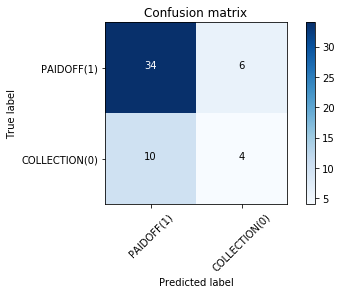

In [114]:
Kernel = "poly"
gamma = 0.1
SVM_model =  svm.SVC(C = 1.0, kernel = Kernel, gamma = Gamma).fit(X,y)
y_pred_SVM = SVM_model.predict(X_test)
compute_confusion_matrix(y_test, y_pred_SVM)

In above confusion matrix, of the __40__ actual PAIDOFF, the KNN model predicted that __6__ were COLLECTION, and of the __14__ COLLECTION, it predicted that __10__ was PAIDOFF. The error rate is higher for COLLECTION compared to PAIDOFF. 

The weighted avg f1-score is __69%__

#### Jaccard index for accuracy:

In [51]:
print(("The jaccard index for accuracy: {0:.3f} ").format(jaccard_similarity_score(y_test, y_pred_SVM)))

The jaccard index for accuracy: 0.704 


### Evaluation of Logistic Regression model on test set¶

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54

Confusion matrix, without normalization
[[40  0]
 [13  1]]


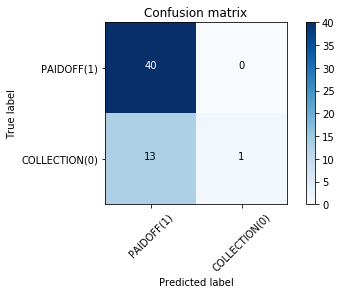

In [115]:
Solver = "newton-cg"
c = 1.
LR_model = LogisticRegression(C=c, solver=Solver).fit(X,y)
y_pred_LR = LR_model.predict(X_test)
compute_confusion_matrix(y_test, y_pred_LR)

In above confusion matrix, of the __40__ actual PAIDOFF, the KNN model predicted that __0__ were COLLECTION, and of the __14__ COLLECTION, it predicted that __13_ was PAIDOFF. The error rate is higher for COLLECTION compared to PAIDOFF. 

The weighted avg f1-score is __67%__

#### Jaccard index for accuracy:

In [116]:
print(("The jaccard index for accuracy: {0:.3f} ").format(jaccard_similarity_score(y_test, y_pred_LR)))

The jaccard index for accuracy: 0.759 


#### log loss:

In [117]:
yhat_prob = LR_model.predict_proba(X_test)
print(("The log loss: {0:.3f} ").format(log_loss(y_test, yhat_prob)))

The log loss: 0.481 


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard    |    F1-score | LogLoss |
|--------------------|------------|-------------|---------|
| KNN                | 0.74       | 0.73        | NA      |
| Decision Tree      | 0.72       | 0.72        | NA      |
| SVM                | 0.70       | 0.69        | NA      |
| LogisticRegression | 0.76       | 0.67        | 0.48    |

The __KNN__ and __Decision Tree__ algorithms has the best performance and __SVM__ has the lowest performance

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>